TensorFlow Version: 2.18.0
Model file found at: models\best_osteoporosis_resnet50.keras

--- Loading Trained Model ---
Model loaded successfully from models\best_osteoporosis_resnet50.keras

--- Predicting for image: C:\Users\91947\Desktop\dap and iot\test\pro\Osteoporosis\Osteoporosis 28.png ---
Loading image: C:\Users\91947\Desktop\dap and iot\test\pro\Osteoporosis\Osteoporosis 28.png


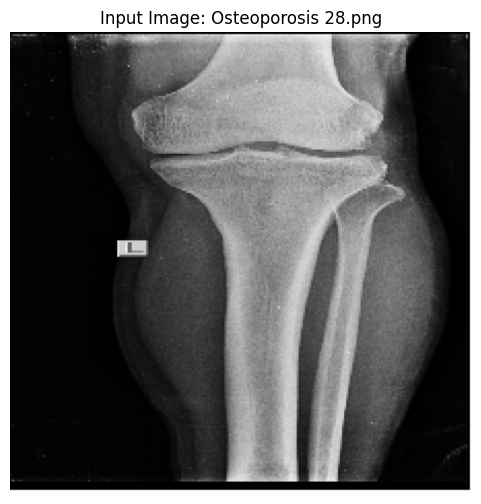

Preprocessing image...
Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Prediction Results ---
Predicted Class: Osteoporosis
Confidence: 46.75%
Class Probabilities:
  - Normal: 30.39%
  - Osteopenia: 22.86%
  - Osteoporosis: 46.75%

Final Prediction: The model predicts the image is 'Osteoporosis' with 46.75% confidence.

--- Prediction cell execution complete ---


In [1]:
# -*- coding: utf-8 -*-
"""
Osteoporosis_Prediction.ipynb

This part of the notebook focuses on loading the pre-trained ResNet50 model
and predicting the class for a single knee X-ray image.
"""

# ## Cell 1: Setup and Configuration (Prediction specific)
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

print("TensorFlow Version:", tf.__version__)
tf.get_logger().setLevel('ERROR') # Suppress TF INFO messages

# --- Configuration Constants Needed for Prediction ---
MODEL_SAVE_PATH = pathlib.Path('./models') # Directory where the trained model is saved
MODEL_FILENAME = 'best_osteoporosis_resnet50.keras' # The saved model file name

# Image parameters MUST match the training setup
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

# Class names MUST match the training setup
CLASS_NAMES = ['Normal', 'Osteopenia', 'Osteoporosis']

# --- Check if model exists ---
model_path_check = MODEL_SAVE_PATH / MODEL_FILENAME
if not model_path_check.exists():
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print(f"ERROR: Trained model not found at: {model_path_check}")
    print(f"Please ensure the model was trained and saved correctly,")
    print(f"or update MODEL_SAVE_PATH and MODEL_FILENAME variables.")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    # You might want to stop execution here in a real notebook scenario
    # raise FileNotFoundError(f"Model file not found: {model_path_check}")
else:
    print(f"Model file found at: {model_path_check}")



# ## Cell 2: Prediction Function

def predict_single_image(image_path, model_to_use, class_names_list, target_img_size):
    """Loads, preprocesses, and predicts the class for a single image."""
    if not pathlib.Path(image_path).is_file():
         print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
         print(f"ERROR: Image file not found at {image_path}")
         print(f"Please check the 'image_path_to_predict' variable.")
         print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
         return None, None # Indicate failure

    try:
        # 1. Load Image
        print(f"Loading image: {image_path}")
        img = image.load_img(image_path, target_size=target_img_size)

        # Display the loaded image
        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Input Image: {os.path.basename(image_path)}")
        plt.show() # Show the input image first

        # 2. Convert to Array & Expand Dimensions
        img_array = image.img_to_array(img)
        img_array_expanded = np.expand_dims(img_array, axis=0)

        # 3. Preprocess (using ResNet50 specific function)
        print("Preprocessing image...")
        # Use copy() to avoid modifying the original array if it's used elsewhere
        preprocessed_img = preprocess_input(img_array_expanded.copy())

        # 4. Predict
        print("Making prediction...")
        predictions = model_to_use.predict(preprocessed_img)
        # Apply softmax to get probabilities
        scores = tf.nn.softmax(predictions[0]).numpy()

        # 5. Decode Prediction
        predicted_class_index = np.argmax(scores)
        predicted_class_name = class_names_list[predicted_class_index]
        confidence = 100 * np.max(scores)

        print(f"\n--- Prediction Results ---")
        print(f"Predicted Class: {predicted_class_name}")
        print(f"Confidence: {confidence:.2f}%")
        print("Class Probabilities:")
        for i, class_name in enumerate(class_names_list):
             print(f"  - {class_name}: {scores[i]*100:.2f}%")

        return predicted_class_name, confidence

    except Exception as e:
        print(f"An error occurred during prediction for {image_path}: {e}")
        return None, None # Indicate failure



# ## Cell 3: Load Model and Predict

# --- Define the path to the image you want to predict ---
# <<< --- !!! IMPORTANT: CHANGE THIS PATH !!! --- >>>
image_path_to_predict = r'C:\Users\91947\Desktop\dap and iot\test\pro\Osteoporosis\Osteoporosis 28.png'
# Example: image_path_to_predict = 'path/to/your/knee_images/test_image_01.jpg'
# Make sure this file actually exists!

# --- Load the Trained Model ---
print("\n--- Loading Trained Model ---")
model_full_path = MODEL_SAVE_PATH / MODEL_FILENAME
loaded_model = None
if model_full_path.exists():
    try:
        loaded_model = load_model(str(model_full_path))
        print(f"Model loaded successfully from {model_full_path}")
        # loaded_model.summary() # Optional: Uncomment to see model structure
    except Exception as e:
        print(f"Error loading model: {e}")
else:
     print(f"Model file {model_full_path} does not exist. Cannot proceed with prediction.")


# --- Perform Prediction (only if model loaded successfully) ---
if loaded_model is not None:
    print(f"\n--- Predicting for image: {image_path_to_predict} ---")
    predicted_class, prediction_confidence = predict_single_image(
        image_path=image_path_to_predict,
        model_to_use=loaded_model,
        class_names_list=CLASS_NAMES,
        target_img_size=IMG_SIZE
    )

    if predicted_class is not None:
        print(f"\nFinal Prediction: The model predicts the image is '{predicted_class}' with {prediction_confidence:.2f}% confidence.")
    else:
        print("\nPrediction failed. Please check errors above.")
else:
    print("\nSkipping prediction because the model could not be loaded.")

print("\n--- Prediction cell execution complete ---")